In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt

**1. Дано набір точок. Необхідно апроксимувати цю залежність поліномом другого ступеня за допомогою нейронної мережі. Розв’язок доповнити графіком із зображенням вихідних точок та кривої, отриманої за допомогою нейронної мережі.**

In [ ]:
X = [-6, -5, -4, -3, -2, -1, 0, 1, 2]
Y = [71.82, 50, 32.24, 18.54, 8.9, 3.32, 1.8, 4.34, 10.94]

Маємо знайти криву вигляду $f(x)=a*x^2+b*x+c$. Для цього необхідно визначити невідомі коефіцієнти $a$, $b$, $c$. Створимо нейромережу з трьома вхідними нейронами (по одному на змінну) і одним вихідним (передбачене значення функції в точці). На вхід передаватимемо трійку $(x^2, x, 1)$.

In [ ]:
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
X_modified = [[x ** 2, x, 1] for x in X]
results = model.fit(np.array(X_modified), np.array(Y), epochs=1500, 
                    batch_size=1, verbose=1)

Epoch 1/1500
9/9 [==============================] - 0s 2ms/step - loss: 301.9703
Epoch 2/1500
9/9 [==============================] - 0s 2ms/step - loss: 298.2452
Epoch 3/1500
9/9 [==============================] - 0s 2ms/step - loss: 294.2779
Epoch 4/1500
9/9 [==============================] - 0s 2ms/step - loss: 291.3948
Epoch 5/1500
9/9 [==============================] - 0s 2ms/step - loss: 288.3644
Epoch 6/1500
9/9 [==============================] - 0s 2ms/step - loss: 284.9359
Epoch 7/1500
9/9 [==============================] - 0s 2ms/step - loss: 280.9432
Epoch 8/1500
9/9 [==============================] - 0s 3ms/step - loss: 277.8532
Epoch 9/1500
9/9 [==============================] - 0s 2ms/step - loss: 275.9817
Epoch 10/1500
9/9 [==============================] - 0s 2ms/step - loss: 271.1912
Epoch 11/1500
9/9 [==============================] - 0s 2ms/step - loss: 268.4467
Epoch 12/1500
9/9 [==============================] - 0s 2ms/step - loss: 265.2899
Epoch 13/1500
9/9 [======

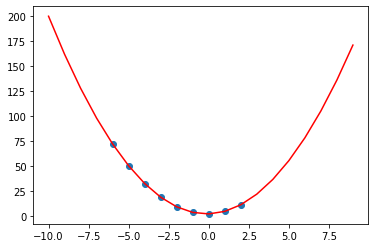

In [ ]:
X_test = range(-10, 10)
X_test_modified = np.array([[x ** 2, x, 1]  for x in X_test])
Y_predicted = model.predict(X_test_modified)

plt.plot(X_test, Y_predicted, c='r')
plt.scatter(X, Y)
plt.show()

**2. Створіть нейронну мережу, яка правильно класифікує об’єкти, використовуючи дані з таблиці.**

In [ ]:
X = np.array([[1, 1, 0], [1, 0 ,1], [0, 1, 1], [0, 1, 0], [0, 1, 1], 
              [0, 0, 1], [0, 1, 0], [1, 1, 1], [0, 0 ,0]], "float32")
Y = np.array([2, 0, 0, 0, 0, 1, 0, 1, 2])
Y = utils.to_categorical(Y.reshape(len(Y), 1))

Оскільки це задача класифікації на 3 класи, то побудуємо нейромережу з трьома вихідними нейронами. Також додамо шар з 30-ти нейронів.

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=3, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
results = model.fit(X, Y, epochs=100, batch_size=1)

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9979 - accuracy: 0.6667
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.9831 - accuracy: 0.5556
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9577 - accuracy: 0.5556
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9455 - accuracy: 0.5556
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9281 - accuracy: 0.5556
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9173 - accuracy: 0.5556
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9009 - accuracy: 0.5556
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8908 - accuracy: 0.5556
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8809 - accuracy: 0.4444
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8687 - accuracy: 0.4444
Epoch 11/100
9/9 [===========

Тренувальний набір покриває всі можливі випадки вхідних даних, крім входу (1, 0, 0). На тренувальному наборі точність досягає 100%. Тепер протестуємо нейромережу на відсутньому вході.

In [ ]:
model.predict([[1, 0, 0]])

array([[0.27399218, 0.1256373 , 0.6003706 ]], dtype=float32)

Результат:
* 27.4%: належить першому класу
* 12.6%: належить другому класу
* 60%: належить третьому класу

Даний приклад належить до першого класу, тобто нейромережа не впоралася. Для запобігання цьому варто було б включити цей приклад в тренувальний набір. Тоді мережа вдало натренується до 100%-ої точності на повному наборі вхідних даних.